Plot statistic data for closeness and throughput for all sites/window sizes

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})

In [2]:
import pandas as pd
import numpy as np
import time
import os
import scipy.stats as stats
import math

opendataset = pd.read_json

ts = time.time()
df = opendataset('allwindows_statisticss.json')
# WARN: This reduce statement is a very computer intesive step
xdf = reduce(lambda x,y: x.add(df[y]), df.keys(), df[df.keys()[0]])
x = df[df.keys()[0]].keys()
thrstd = []
clsstd = []
clsavg = []
clsavgerr = []
z = stats.norm.ppf(q = 0.975)
srn = math.sqrt(len(df.keys()))
print '95 percentile taking into account %d links' % len(df.keys())
for key in df[df.keys()[0]].keys():
    # list of tuples [(thrstd, clsstd, maxcls-mincls)]
    thrstd.append(np.sum(np.array(xdf[key][0::3])))
    clsstd.append(np.sum(np.array(xdf[key][1::3])))
    clsavg.append(np.average(np.array(xdf[key][2::3])))
    clsavgerr.append(z * (np.std(np.array(xdf[key][2::3]))) / srn)
print 'Total elapsed time %.02f min.' % ((time.time() - ts)/60.)


95 percentile taking into account 15250 links
Total elapsed time 65.20 min.


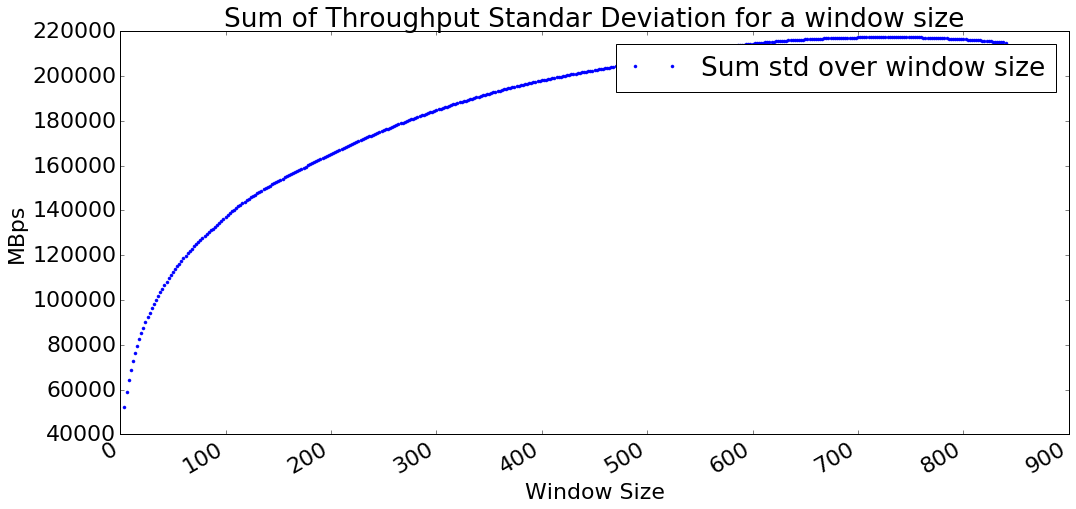

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(x, thrstd, '.', label='Sum std over window size')
ax.set_ylabel('MBps')
ax.set_xlabel('Window Size')
plt.legend()
plt.title('Sum of Throughput Standar Deviation for a window size')
fig = plt.gcf()
fig.set_size_inches(17, 8)

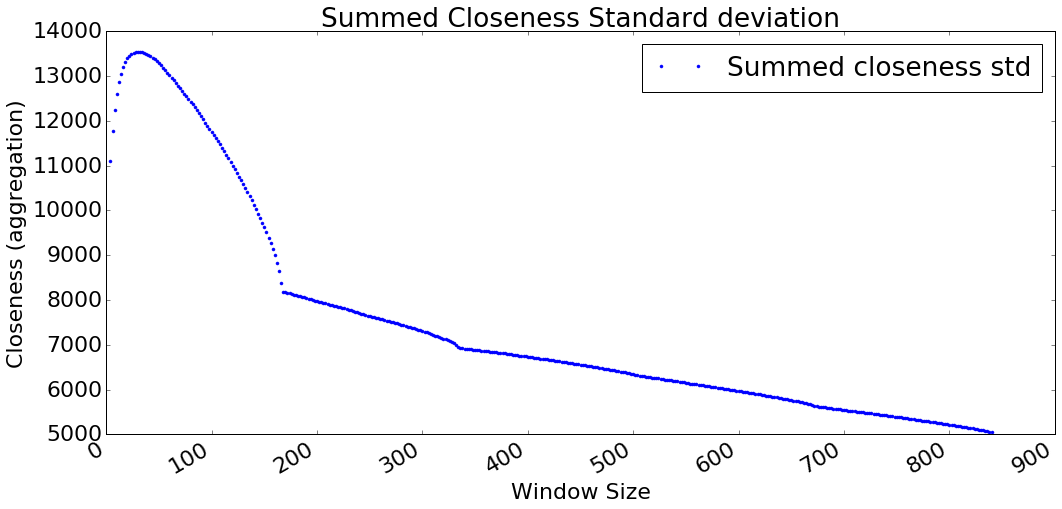

In [7]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.plot(x, clsstd, '.', label='Summed closeness std')
ax.set_ylabel('Closeness (aggregation)')
ax.set_xlabel('Window Size')
plt.legend()
plt.title('Summed Closeness Standard deviation')
fig = plt.gcf()
fig.set_size_inches(17, 8)

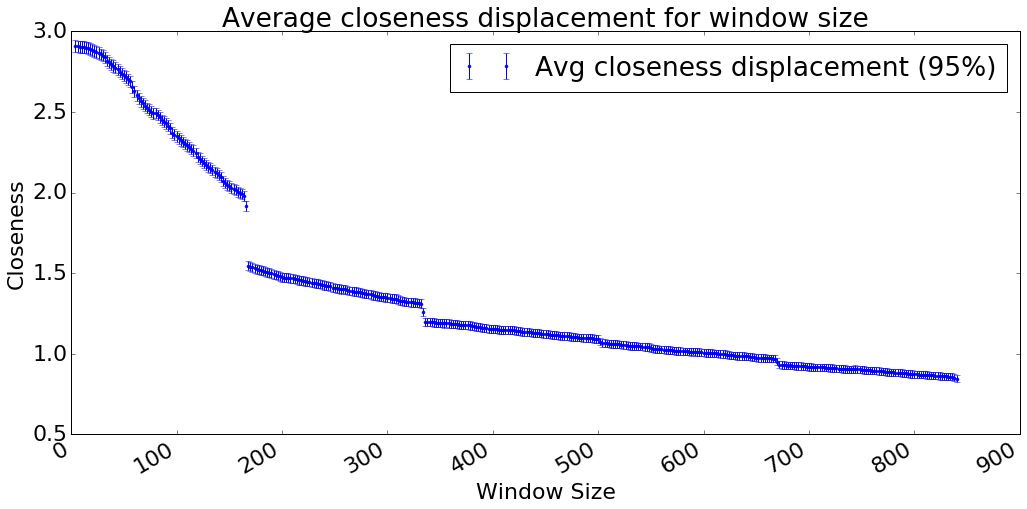

In [8]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
plt.errorbar(x, clsavg, yerr=clsavgerr, fmt='.', label='Avg closeness displacement (95%)')
ax.set_ylabel('Closeness')
ax.set_xlabel('Window Size')
plt.legend()
plt.title('Average closeness displacement for window size')
fig = plt.gcf()
fig.set_size_inches(17, 8)